# Spotify Machine Learning

In [1]:
# Libraries

import json

import pandas as pd
from pandas.io.json import json_normalize

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
# Import JSON files

with open("top_tracks_attributes.json") as f:
    top_tracks_json = json.load(f)
    
with open("pop_tracks_attributes.json") as f:
    genre_tracks_json = json.load(f)
    
# with open
    
top_tracks = json_normalize(top_tracks_json)
top_tracks['rank'] = range(1, len(top_tracks) + 1)
top_tracks['rank'] = top_tracks['rank'] / len(top_tracks)

genre_tracks = json_normalize(genre_tracks_json)

## Characteristics to Analyze

1. acousticness
2. danceability
3. energy
4. instrumentalness
5. liveness
6. loudness
7. speechiness
8. valence

Predicting: rank

Assume all attributes of are equal weight initially.

In [3]:
train = top_tracks.sample(frac=.8)
test = top_tracks.drop(train.index)

In [4]:
train

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,rank
43,0.305000,https://api.spotify.com/v1/audio-analysis/66YH...,0.315,216800,0.218,66YHxyGAUGjMBDdrDlWIMD,0.001200,0,0.2260,-15.215,1,0.0731,175.861,4,https://api.spotify.com/v1/tracks/66YHxyGAUGjM...,audio_features,spotify:track:66YHxyGAUGjMBDdrDlWIMD,0.1560,0.44
1,0.150000,https://api.spotify.com/v1/audio-analysis/5HNC...,0.472,382297,0.366,5HNCy40Ni5BZJFw1TKzRsC,0.308000,11,0.0837,-12.595,0,0.0286,127.167,4,https://api.spotify.com/v1/tracks/5HNCy40Ni5BZ...,audio_features,spotify:track:5HNCy40Ni5BZJFw1TKzRsC,0.1710,0.02
9,0.004740,https://api.spotify.com/v1/audio-analysis/5EYd...,0.841,260507,0.741,5EYdTPdJD74r9EVZBztqGG,0.012100,0,0.0911,-6.222,0,0.0392,122.984,4,https://api.spotify.com/v1/tracks/5EYdTPdJD74r...,audio_features,spotify:track:5EYdTPdJD74r9EVZBztqGG,0.9700,0.10
60,0.000213,https://api.spotify.com/v1/audio-analysis/0Ti2...,0.309,206587,0.875,0Ti2dlF2xLjXblvdU5fCxM,0.001680,1,0.1130,-4.490,1,0.0488,143.526,4,https://api.spotify.com/v1/tracks/0Ti2dlF2xLjX...,audio_features,spotify:track:0Ti2dlF2xLjXblvdU5fCxM,0.7250,0.61
78,0.066400,https://api.spotify.com/v1/audio-analysis/4qHS...,0.698,214267,0.736,4qHSciBVrNNpUlI8TT9CHQ,0.000022,2,0.1190,-5.525,1,0.0481,127.979,4,https://api.spotify.com/v1/tracks/4qHSciBVrNNp...,audio_features,spotify:track:4qHSciBVrNNpUlI8TT9CHQ,0.8220,0.79
54,0.030900,https://api.spotify.com/v1/audio-analysis/0Ws3...,0.232,310387,0.895,0Ws3haBpuaBIaRnWKrkNCg,0.000003,9,0.1290,-5.449,0,0.1010,175.744,4,https://api.spotify.com/v1/tracks/0Ws3haBpuaBI...,audio_features,spotify:track:0Ws3haBpuaBIaRnWKrkNCg,0.6030,0.55
6,0.012500,https://api.spotify.com/v1/audio-analysis/7f0v...,0.522,245960,0.923,7f0vVL3xi4i78Rv5Ptn2s1,0.017000,2,0.0854,-4.560,1,0.0539,170.057,4,https://api.spotify.com/v1/tracks/7f0vVL3xi4i7...,audio_features,spotify:track:7f0vVL3xi4i78Rv5Ptn2s1,0.5950,0.07
61,0.006000,https://api.spotify.com/v1/audio-analysis/12pd...,0.572,214360,0.864,12pdXFcruNcPUbZypKUDgz,0.000008,7,0.2170,-5.099,0,0.0395,106.018,4,https://api.spotify.com/v1/tracks/12pdXFcruNcP...,audio_features,spotify:track:12pdXFcruNcPUbZypKUDgz,0.6670,0.62
88,0.000760,https://api.spotify.com/v1/audio-analysis/1jJc...,0.451,302840,0.931,1jJci4qxiYcOHhQR247rEU,0.004900,9,0.3610,-3.871,1,0.0719,122.961,4,https://api.spotify.com/v1/tracks/1jJci4qxiYcO...,audio_features,spotify:track:1jJci4qxiYcOHhQR247rEU,0.1720,0.89
98,0.415000,https://api.spotify.com/v1/audio-analysis/56ig...,0.528,174570,0.534,56igd7MEiyiKaDS7z5czJn,0.000000,9,0.1530,-8.446,1,0.4400,82.288,4,https://api.spotify.com/v1/tracks/56igd7MEiyiK...,audio_features,spotify:track:56igd7MEiyiKaDS7z5czJn,0.8450,0.99


In [5]:
X_train = train[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_train = train['rank']
X_test = test[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_test = test['rank']

## Find Optimal K-Value

In [7]:
def get_Kneighbors_test_error(k):
    scaler = StandardScaler()
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([('transform', scaler), ('fit', model)])
    return np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

In [17]:
ks = pd.Series(range(1, 70, 1))
ks.index = ks

k_cross_val = ks.apply(get_Kneighbors_test_error)

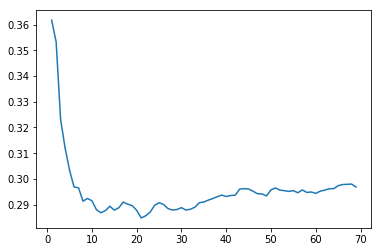

In [18]:
k_cross_val.plot()
k = k_cross_val.idxmin()

## K-nearest Neighbors Analysis

In [9]:
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors= k)
pipeline = Pipeline([('transform', scaler), ('fit', model)])
np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

0.26426711746829196

In [10]:
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_test_pred

array([0.44666667, 0.6175    , 0.3425    , 0.57916667, 0.52916667,
       0.66833333, 0.6225    , 0.55083333, 0.63916667, 0.65833333,
       0.44666667, 0.63333333, 0.63416667, 0.65833333, 0.64333333,
       0.57416667, 0.65083333, 0.4825    , 0.62916667, 0.645     ])

In [11]:
genre_test = genre_tracks[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]

In [12]:
ranked_indices = genre_test.join(pd.Series(model.predict(genre_test) * len(genre_tracks)).rename("predicted_rank")).sort_values("predicted_rank")

In [13]:
genre_tracks.loc[ranked_indices.index.tolist(), 'id'].tolist()

['7wC5eZcFS1Q1BsQ35DU6H4',
 '4h0zU3O9R5xzuTmNO7dNDU',
 '4S7YHmlWwfwArgd8LfSPud',
 '7wvwXi9Z66dcH5t202vVkN',
 '1tT55K6VEyO6XFDxK4lDQe',
 '4eSGSqP2TZvvX0kadZZttM',
 '047fCsbO4NdmwCBn8pcUXl',
 '7vRriwrloYVaoAe3a9wJHe',
 '04sN26COy28wTXYj3dMoiZ',
 '0utlOiJy2weVl9WTkcEWHy',
 '2VlLbhGLVJgdOW7kKdWWFc',
 '7tGEAA1f8MydT7eVbbO9Zy',
 '16qYlQ6koFxYVbiJbGHblz',
 '6I6NX6tjGsxFAsIfGzY9lJ',
 '5mCPDVBb16L4XQwDdbRUpz',
 '152lZdxL1OR0ZMW6KquMif',
 '5JB6aAEqAWZG7MLkbyYUs5',
 '6fFTPGGItuEpjwXRUIr4rk',
 '6lzLjIOyWTyTJvk0jraYee',
 '1Jl21sidRpEdlVBvYbssLx',
 '29H8RkqW9GaFy8tdjriuX3',
 '2JvzF1RMd7lE3KmFlsyZD8',
 '18uwL0vNUanqZH0ro2QcOP',
 '6G8kHiVZ1jW7vHMPVRNZU0',
 '7oOOI85fVQvVnK5ynNMdW7',
 '7bdYxWPCs46dQ0XLwySOyv',
 '5aqu5xhPqoOWqF71PkfgM8',
 '2QZ7WLBE8h2y1Y5Fb8RYbH',
 '43PuMrRfbyyuz4QpZ3oAwN',
 '3kxfsdsCpFgN412fpnW85Y',
 '2OpBganfGk2GVdSlRdxzaX',
 '1wZqJM5FGDEl3FjHDxDyQd',
 '6n3HGiq4v35D6eFOSwqYuo',
 '6vsV4D8BM6PioRr1UOx0n2',
 '0XOnMqLQDO89iAg7dWWwnG',
 '6NFyWDv5CjfwuzoCkw47Xf',
 '76tGvMdmFKuiMew33ZNNA9',
 

In [3]:
ranked_indices.loc[1:10, 'predicted_rank']

NameError: name 'ranked_indices' is not defined